In [ ]:
#install dependencies

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Lenovo\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\pip-install-fto9t6sh\\tensorflow-gpu_9df0361685e34be38e6558c3dee4d73e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\pip-install-fto9t6sh\\tensorflow-gpu_9df0361685e34be38e6558c3dee4d73e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Lenovo\AppData\Local\Temp\pip-wheel-vjr6dcen'
       cwd: C:\Users\Lenovo\AppData\Local\Temp\pip-install-fto9t6sh\tensorflow-gpu_9df0361685e34be38e6558c3dee4d73e\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "

  Running setup.py clean for tensorflow-gpu
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=627fa3206b33a0a1bd026bcb509eedfaa0d8c560d561e279c4c7ff3fbcfa5e0d
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [4]:
df=pd.read_csv(os.path.join( 'jigsaw-toxic-comment-classification-challenge','train.csv','train.csv' ))

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.iloc[5]['comment_text']

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

#preprocess

In [7]:
from tensorflow.keras.layers import TextVectorization

In [8]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [9]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [10]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [11]:
MAX_FEATURES=200000 # no of words in the vocab

In [12]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,
                            output_sequence_length=1800,
                            output_mode='int')

In [14]:
#training of data
vectorized_text=vectorizer(x.values)

In [15]:
len(x)

159571

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [17]:
#MCSHBAP-map,cache,shuffle,batch,prefetch,from_tensor_Slices,list_file
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)#helps bottleneck

In [18]:
batch_x,batch_y= dataset.as_numpy_iterator().next()

In [19]:
batch_y.shape

(16, 6)

In [20]:
batch_x

array([[ 4847,     8,   199, ...,     0,     0,     0],
       [    8,   595,    26, ...,     0,     0,     0],
       [    2,  1043,  4818, ...,     0,     0,     0],
       ...,
       [21029,    86,    15, ...,     0,     0,     0],
       [15097,  1579,   232, ...,     0,     0,     0],
       [   12,     9,     6, ...,     0,     0,     0]], dtype=int64)

In [21]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [22]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [23]:
train_generator=train.as_numpy_iterator()

In [24]:
train_generator.next()

(array([[  84,   18,    6, ...,    0,    0,    0],
        [ 481,    2,  245, ...,    0,    0,    0],
        [   3,  194,   12, ...,    0,    0,    0],
        ...,
        [ 941,  878,  178, ...,    0,    0,    0],
        [   7,   69,    2, ...,    0,    0,    0],
        [  28, 1383,  165, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 1, 1, 1, 0]], dtype=int64))

# building neural network


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [26]:
model =Sequential()
#Create the embedding layer
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation='tanh')))
#Feature extractor fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
#Final layer
model.add(Dense(6,activation='sigmoid'))

In [27]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [30]:
history= model.fit(train,epochs=5,validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 7368s 1s/step - loss: 0.0636 - val_loss: 0.0440
Epoch 2/5
6981/6981 [==============================] - 13829s 2s/step - loss: 0.0450 - val_loss: 0.0398
Epoch 3/5
6981/6981 [==============================] - 8159s 1s/step - loss: 0.0408 - val_loss: 0.0357
Epoch 4/5
6981/6981 [==============================] - 7482s 1s/step - loss: 0.0360 - val_loss: 0.0322
Epoch 5/5
6981/6981 [==============================] - 7492s 1s/step - loss: 0.0317 - val_loss: 0.0276


In [31]:
hist=history.history

In [32]:
hist

{'loss': [0.06364796310663223,
  0.04501878470182419,
  0.040751200169324875,
  0.036042407155036926,
  0.03173524886369705],
 'val_loss': [0.04399466514587402,
  0.03979260474443436,
  0.03567107394337654,
  0.03219646215438843,
  0.027608733624219894]}

# make predictions

In [33]:
batch=test.as_numpy_iterator().next()

In [34]:
batch_x,batch_y=test.as_numpy_iterator().next()

In [35]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 3s 3s/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [36]:
res=model.predict(batch_x)

1/1 [==============================] - 0s 306ms/step


In [37]:
res.shape

(16, 6)

In [38]:
res

array([[2.54104321e-04, 4.46959466e-14, 1.14771392e-04, 2.49457770e-08,
        4.81906591e-06, 7.36067022e-06],
       [9.99925077e-01, 4.56129134e-01, 9.86867130e-01, 1.57435343e-01,
        9.67571974e-01, 4.89978433e-01],
       [6.62898179e-03, 8.27298841e-10, 1.44420075e-03, 1.62900378e-05,
        7.51925283e-04, 2.99393054e-04],
       [4.44607204e-03, 2.45330201e-10, 1.15914806e-03, 7.28142049e-06,
        4.20660828e-04, 1.85746438e-04],
       [1.20943738e-02, 1.21695258e-08, 3.20120505e-03, 7.40447504e-05,
        1.79077033e-03, 9.14385077e-04],
       [7.17869341e-01, 4.73732391e-04, 4.71238345e-02, 1.24923931e-03,
        1.16918437e-01, 6.51185727e-03],
       [2.06917524e-03, 1.35324529e-11, 5.22126036e-04, 1.68412953e-06,
        1.53515110e-04, 6.31032453e-05],
       [7.33581722e-01, 5.81316010e-04, 7.15892985e-02, 8.73621902e-04,
        1.18125729e-01, 4.56165150e-03],
       [9.97936666e-01, 2.26258337e-01, 9.59928215e-01, 3.84627692e-02,
        9.11541283e-01, 

In [39]:
(res>0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# evaluate model

In [66]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [67]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
    #unpack the batch
    x_true,y_true=batch
    #make a prediction
    yhat=model.predict(x_true)
    
    y_true=y_true.flatten()
    yhat=yhat.flatten()
    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 113ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 117ms/step


In [72]:

print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.8877742886543274, Recall:0.8230165839195251, Accuracy:0.523570716381073


In [45]:
!pip install gradio jinja2

In [44]:
import gradio as gr

In [45]:
model.save('toxicity.h5')

In [46]:
model= tf.keras.models.load_model('toxicity.h5')

In [48]:
res = model.predict(np.expand_dims(input_str,0))


1/1 [==============================] - 2s 2s/step


In [49]:
res

array([[0.6931753 , 0.00223025, 0.04850566, 0.01065969, 0.15972678,
        0.02971382]], dtype=float32)

In [50]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [51]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Lenovo\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [52]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ae9dc0706c580035df.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 212ms/step


In [54]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

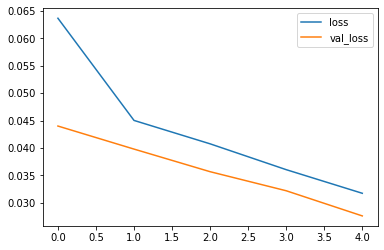

1/1 [==============================] - 0s 201ms/step


In [55]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()